In [1]:
# Dataframe
import pandas as pd

# Array
import numpy as np
import ast

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# Datetime
from datetime import datetime

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

# Large dataset
import dask.bag as db

# STRINGS
import re

In [38]:
###############################################################################
### 1)What is the relation between the reviews and the helpfulness?
###############################################################################

##########################################
## IMPORT REVIEWS DATA
##########################################
review_df = pd.read_csv(r'review_df.csv')
review_df.head()

,Unnamed: 0,Unnamed: 0.1,reviewerID,asin,reviewerName,helpful,reviewText,Rating,summary,unixReviewTime,...,reviewMonth,reviewWeekday,positiveVote,totalVote,totalVote_flag,totalVote_score,characterLength,wordLength,sentimentScore,sentimentScore_flag
0,0,0,A1KLRMWW2FWPL4,0000031887,"Amazon Customer ""cameramom""","[0, 0]",This is a great tutu and at a really great pri...,5.0,Great tutu- not cheaply made,1297468800,...,2,5,0,0,No Votes,0.0,172,35,0.9332,pos
1,1,1,A2G5TCU2WDFZ65,0000031887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5.0,Very Cute!!,1358553600,...,1,5,0,0,No Votes,0.0,306,61,0.9348,pos
2,2,2,A1RLQXYNCMWRWN,0000031887,Carola,"[0, 0]",What can I say... my daughters have it in oran...,5.0,I have buy more than one,1357257600,...,1,4,0,0,No Votes,0.0,312,62,0.9818,pos
3,3,3,A8U3FAMSJVHS5,0000031887,Caromcg,"[0, 0]","We bought several tutus at once, and they are ...",5.0,"Adorable, Sturdy",1398556800,...,4,6,0,0,No Votes,0.0,405,76,0.6614,pos
4,4,4,A3GEOILWLK86XM,0000031887,CJ,"[0, 0]",Thank you Halo Heaven great product for Little...,5.0,Grammy's Angels Love it,1394841600,...,3,5,0,0,No Votes,0.0,453,80,0.9869,pos


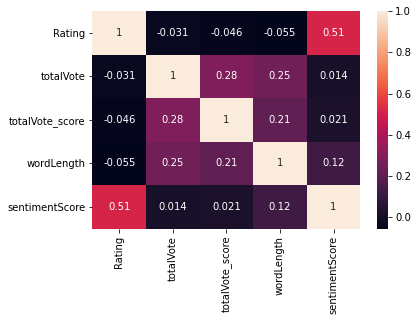

In [35]:
##########################################
## CORRELATION MATRIX - REVIEWS BASIC STATS
##########################################
df_correl_rev = pd.DataFrame(review_df,columns=['Rating',
                                              #'positiveVote',
                                              'totalVote',                                              
                                              'totalVote_score',
                                              'wordLength',
                                              'sentimentScore'])
corrMatrix = df_correl_rev.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

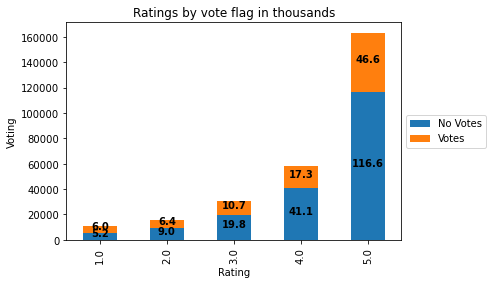

In [21]:
##########################################
## DISTRIBUTION OF REVIEWS WITH VOTES
##########################################
df_grouped = review_df.groupby(['Rating','totalVote_flag']).count()['totalVote'].unstack()
my_plot = df_grouped.plot(kind='bar',stacked=True,title="Ratings by vote flag in thousands")
my_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
my_plot.set_xlabel("Rating")
my_plot.set_ylabel("Voting")
for p in my_plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    my_plot.annotate(f'{(height/1000).round(1)}', (x + width/2, y + height*0.5), ha='center', rotation=0, fontweight='bold')

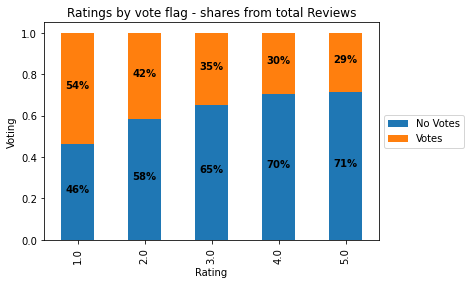

In [22]:
freq_df = review_df.groupby(['Rating','totalVote_flag']).count()['totalVote'].unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
my_plot = pct_df.plot(kind="bar", stacked=True, title="Ratings by vote flag - shares from total Reviews")
my_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
my_plot.set_xlabel("Rating")
my_plot.set_ylabel("Voting")
# loop to add the annotations
for p in my_plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    my_plot.annotate(f'{height:.0%}', (x + width/2, y + height*0.5), ha='center', fontweight='bold')

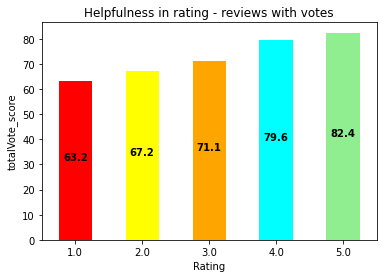

In [23]:
my_plot = review_df[review_df['totalVote_flag'] == 'Votes'].groupby('Rating')['totalVote_score'].mean().plot(kind='bar', color=['red', 'yellow', 'orange', 'cyan', 'lightgreen']) 
plt.title("Helpfulness in rating - reviews with votes")
plt.xlabel("Rating")
plt.ylabel("totalVote_score")
plt.xticks(rotation=0)
# loop to add the annotations
for p in my_plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    my_plot.annotate(f'{height.round(1)}', (x + width/2, y + height*0.5), ha='center', rotation=0, color = 'black', fontweight='bold')

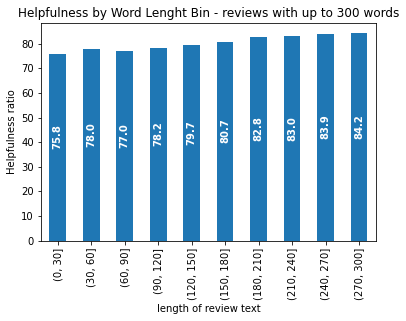

In [24]:
my_plot = review_df[(review_df['totalVote_flag'] == 'Votes') & (review_df['wordLength'] <= 300)].groupby(pd.cut(
review_df[(review_df['totalVote_flag'] == 'Votes') & (review_df['wordLength'] <= 300)]['wordLength'], np.arange(0,301,30)))['totalVote_score'].mean().plot(kind='bar') 
plt.xlabel("length of review text")
plt.ylabel("Helpfulness ratio")
plt.title("Helpfulness by Word Lenght Bin - reviews with up to 300 words")

#plt.rcParams['figure.figsize'] = [12, 6]
#plt.rcParams['figure.figsize'] = plt.rcParamsDefault["figure.figsize"]
# loop to add the annotations
for p in my_plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    my_plot.annotate(f'{height.round(1)}', (x + width/2, y + height*0.5), ha='center', rotation=90, color = 'white', fontweight='bold')

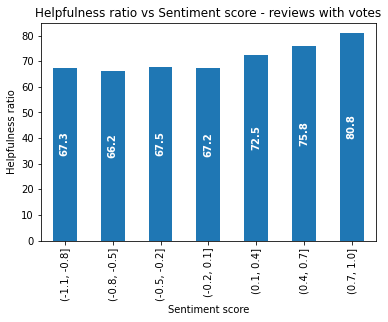

In [95]:
my_plot = review_df[review_df['totalVote_flag'] == 'Votes'].groupby(pd.cut(review_df[review_df['totalVote_flag'] == 'Votes']['sentimentScore'], np.arange(-1.1,1.1,0.3)))['totalVote_score'].mean().plot(kind='bar')
plt.xlabel("Sentiment score")
plt.ylabel("Helpfulness ratio")
plt.title("Helpfulness ratio vs Sentiment score - reviews with votes")
# loop to add the annotations
for p in my_plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    my_plot.annotate(f'{height.round(1)}', (x + width/2, y + height*0.5), ha='center', rotation=90, color = 'white', fontweight='bold')

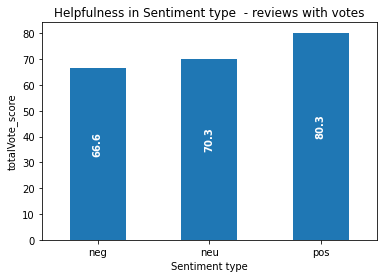

In [26]:
my_plot = review_df[review_df['totalVote_flag'] == 'Votes'].groupby('sentimentScore_flag')['totalVote_score'].mean().plot(kind='bar') 
plt.title("Helpfulness in Sentiment type  - reviews with votes")
plt.xlabel("Sentiment type")
plt.ylabel("totalVote_score")
plt.xticks(rotation=0)
# loop to add the annotations
for p in my_plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    my_plot.annotate(f'{height.round(1)}', (x + width/2, y + height*0.5), ha='center', rotation=90, color = 'white', fontweight='bold')

In [37]:
###############################################################################
### 2)What is the review behavior among different categories? - JUST AN EXAMPLE. THERE IS DATA STUDIO REPORT ON THIS TOPIC
###############################################################################

##########################################
## IMPORT PRODUCT REVIEW DATA
##########################################
product = pd.read_csv(r'asin_df.csv')

product_agg =  product.groupby('category',as_index=False).agg({'asin':'count',
                                                               'price':'mean',
                                                               'rank':'mean',
                                                               'avg_Rating_all':'mean',
                                                               'avg_wordLength_all':'mean',
                                                               'avg_sentimentScore_all':'mean',
                                                               'cnt_Reviews_all':'sum',
                                                               'sum_positiveVote_all':'sum',
                                                               'sum_totalVote_all':'sum',
                                                               'avg_Rating_votes':'mean',
                                                               'avg_totalVote_score_votes_correct':'mean',
                                                               'avg_wordLength_votes':'mean',
                                                               'avg_sentimentScore_votes':'mean',
                                                               'cnt_Reviews_votes':'sum',
                                                               'avg_Rating_pos_sen':'mean',
                                                               'avg_totalVote_score_votes_pos_sen':'mean',
                                                               'avg_wordLength_pos_sen':'mean',
                                                               'avg_sentimentScore_pos_sen':'mean',
                                                               'cnt_Reviews_pos_sen':'sum',
                                                               'avg_Rating_neu_sen':'mean',
                                                               'avg_totalVote_score_votes_neu_sen':'mean',
                                                               'avg_wordLength_neu_sen':'mean',
                                                               'avg_sentimentScore_neu_sen':'mean',
                                                               'cnt_Reviews_neu_sen':'sum',
                                                               'avg_Rating_neg_sen':'mean',
                                                               'avg_totalVote_score_votes_neg_sen':'mean',
                                                               'avg_wordLength_neg_sen':'mean',
                                                               'avg_sentimentScore_neg_sen':'mean',
                                                               'cnt_Reviews_neg_sen':'sum'
                                                               })

product_agg.rename(columns =   {'asin':'N of Products',
                                'price':'Average Price',
                                'rank':'Average Sales rank',
                                'avg_Rating_all':'Average Rating',
                                'avg_wordLength_all':'Average words in review',
                                'avg_sentimentScore_all':'Average Sentiment Score',
                                'cnt_Reviews_all':'Total Reviews',
                                'sum_positiveVote_all':'Positive Votes',
                                'sum_totalVote_all':'Total Votes',
                                'avg_Rating_votes':'Average Rating with Votes',
                                'avg_totalVote_score_votes_correct':'Helpfulness',
                                'avg_wordLength_votes':'Average words in review with Votes',
                                'avg_sentimentScore_votes':'Average Sentiment Score with votes',
                                'cnt_Reviews_votes':'Total Reviews with votes',
                                'avg_Rating_pos_sen':'Average Rating with Positive Sentiment',
                                'avg_totalVote_score_votes_pos_sen':'Helpfulness votes on reviews with Positive Sentiment',
                                'avg_wordLength_pos_sen':'Average words in review with Positive Sentiment',
                                'avg_sentimentScore_pos_sen':'Average Sentiment Score with Positive Sentiment',
                                'cnt_Reviews_pos_sen':'Total Reviews with Positive Sentiment',
                                'avg_Rating_neu_sen':'Average Rating with Neutral Sentiment',
                                'avg_totalVote_score_votes_neu_sen':'Helpfulness votes on reviews with Neutral Sentiment',
                                'avg_wordLength_neu_sen':'Average words in review with Neutral Sentiment',
                                'avg_sentimentScore_neu_sen':'Average Sentiment Score with Neutral Sentiment',
                                'cnt_Reviews_neu_sen':'Total Reviews with Neutral Sentiment',
                                'avg_Rating_neg_sen':'Average Rating with Negative Sentiment',
                                'avg_totalVote_score_votes_neg_sen':'Helpfulness votes on reviews with Negative Sentiment',
                                'avg_wordLength_neg_sen':'Average words in review with Negative Sentiment',
                                'avg_sentimentScore_neg_sen':'Average Sentiment Score with Negative Sentiment',
                                'cnt_Reviews_neg_sen':'Total Reviews with Negative Sentiment'
                               }, inplace = True)

product_agg.head(30)

,category,N of Products,Average Price,Average Sales rank,Average Rating,Average words in review,Average Sentiment Score,Total Reviews,Positive Votes,Total Votes,...,Average Rating with Neutral Sentiment,Helpfulness votes on reviews with Neutral Sentiment,Average words in review with Neutral Sentiment,Average Sentiment Score with Neutral Sentiment,Total Reviews with Neutral Sentiment,Average Rating with Negative Sentiment,Helpfulness votes on reviews with Negative Sentiment,Average words in review with Negative Sentiment,Average Sentiment Score with Negative Sentiment,Total Reviews with Negative Sentiment
0,"Arts, Crafts & Sewing",31,6.432258,18549.129032,4.265989,44.171314,0.619853,377,291,332,...,3.414868,19.425287,35.523463,0.122801,82.0,2.232143,37.500000,56.303571,-0.715431,22.0
1,Automotive,14,18.983571,2512.357143,3.975243,49.615702,0.603774,144,147,177,...,3.334921,21.666667,32.907143,0.140685,37.0,2.333333,25.000000,68.333333,-0.733200,3.0
2,Baby,6,31.538333,5560.500000,4.390993,126.938131,0.770794,57,84,99,...,3.800000,61.666667,62.200000,0.152965,9.0,NaN,NaN,NaN,NaN,0.0
3,Beauty,71,10.798983,39195.084507,3.950728,52.706893,0.596777,750,1011,1192,...,3.239653,22.696199,40.922778,0.150473,177.0,1.829861,36.419986,62.788194,-0.686109,39.0
4,Camera &amp; Photo,3,145.496667,6893.000000,4.411111,413.802778,0.938253,19,94,101,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
5,Cell Phones & Accessories,5,186.072000,8891.800000,3.982197,202.221667,0.662370,77,462,637,...,3.900000,42.607323,91.600000,-0.116523,10.0,1.777778,58.055556,158.444444,-0.798189,5.0
6,Clothing,10768,23.108101,70443.800427,4.198003,56.893691,0.672590,139752,170293,198420,...,3.422822,24.303548,42.866842,0.120213,24731.0,2.414728,29.403810,63.571710,-0.697231,4525.0
7,Computers & Accessories,2,45.330000,7208.500000,3.809524,237.845238,0.633387,13,6,8,...,3.000000,0.000000,110.000000,-0.214400,1.0,2.000000,0.000000,118.000000,-0.917900,1.0
8,Electronics,9,47.646667,25306.333333,4.464352,142.802116,0.790358,74,193,227,...,2.833333,4.166667,44.916667,0.044167,6.0,4.000000,16.666667,61.000000,-0.620350,2.0
9,Health & Personal Care,95,22.378696,85035.421053,4.309132,67.134528,0.602970,1009,1518,1841,...,3.752200,29.414675,49.328360,0.132217,230.0,2.924837,32.030633,69.774510,-0.706486,57.0


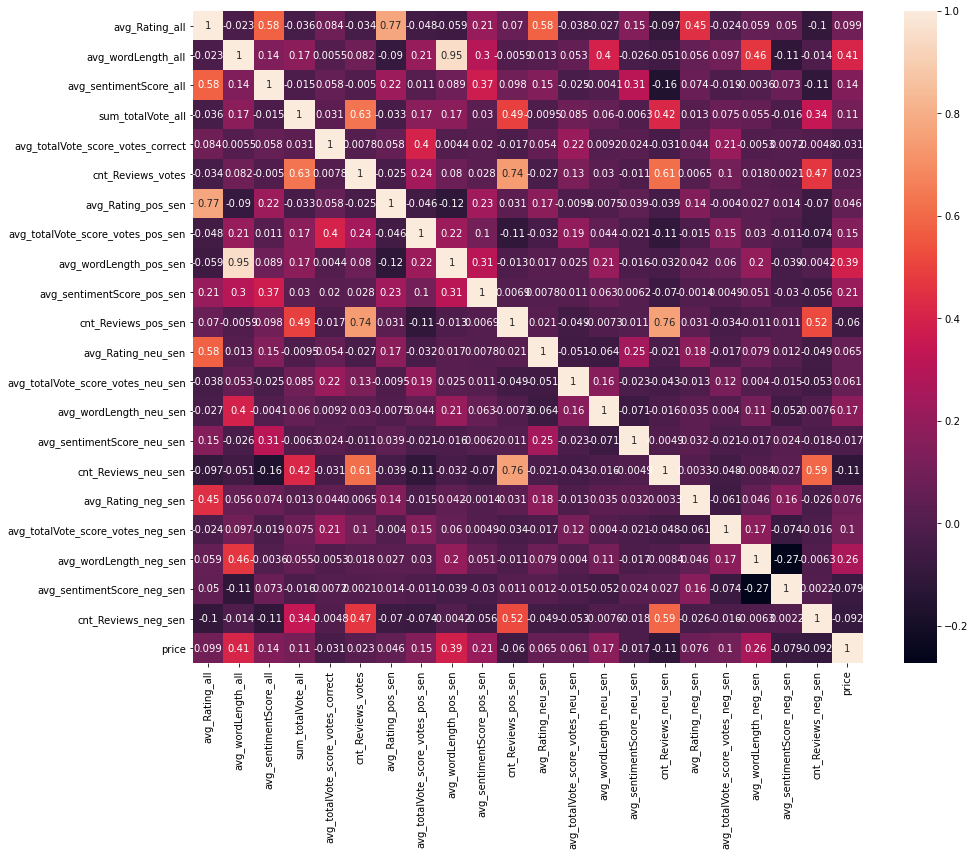

In [36]:
###############################################################################
### 3)Is there a relationship between price and reviews?
###############################################################################
##########################################
## IMPORT PRODUCT REVIEW DATA IN PANDAS
##########################################
product = pd.read_csv(r'asin_df.csv')

##########################################
## CORRELATION MATRIX
##########################################

df_correl_prod = pd.DataFrame(product,columns=['avg_Rating_all',
                                          'avg_wordLength_all',
                                          'avg_sentimentScore_all',
                                          #'cnt_Reviews_all',
                                          #'sum_positiveVote_all',
                                          'sum_totalVote_all',
                                          'avg_totalVote_score_votes_correct',
                                          'cnt_Reviews_votes',
                                          'avg_Rating_pos_sen',
                                          'avg_totalVote_score_votes_pos_sen',
                                          'avg_wordLength_pos_sen',
                                          'avg_sentimentScore_pos_sen',
                                          'cnt_Reviews_pos_sen',
                                          'avg_Rating_neu_sen',
                                          'avg_totalVote_score_votes_neu_sen',
                                          'avg_wordLength_neu_sen',
                                          'avg_sentimentScore_neu_sen',
                                          'cnt_Reviews_neu_sen',
                                          'avg_Rating_neg_sen',
                                          'avg_totalVote_score_votes_neg_sen',
                                          'avg_wordLength_neg_sen',
                                          'avg_sentimentScore_neg_sen',
                                          'cnt_Reviews_neg_sen',                                            
                                          'price'                                              
                                         ])
corrMatrix = df_correl_prod.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corrMatrix, annot=True)
plt.show()

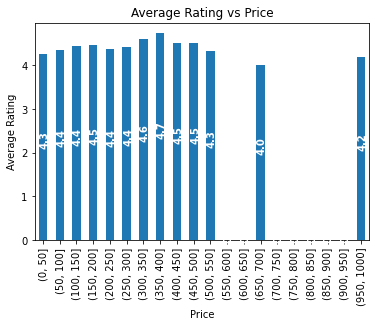

In [133]:
#product
my_plot = product.groupby(pd.cut(product['price'], np.arange(0,1001,50)))['avg_Rating_all'].mean().plot(kind='bar')
plt.xlabel("Price")
plt.ylabel("Average Rating")
plt.title("Average Rating vs Price")
# loop to add the annotations
for p in my_plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    my_plot.annotate(f'{height.round(1)}', (x + width/1.5, y + height*0.5), ha='center', rotation=90, color = 'white', fontweight='bold')   
    

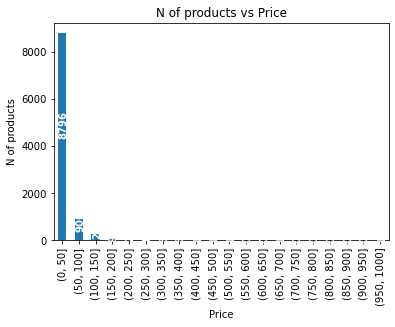

In [121]:
#product
my_plot = product.groupby(pd.cut(product['price'], np.arange(0,1001,50)))['asin'].count().plot(kind='bar')
plt.xlabel("Price")
plt.ylabel("N of products")
plt.title("N of products vs Price")
# loop to add the annotations
for p in my_plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    my_plot.annotate(f'{height.round(1)}', (x + width/1.5, y + height*0.5), ha='center', rotation=90, color = 'white', fontweight='bold')   

    
    

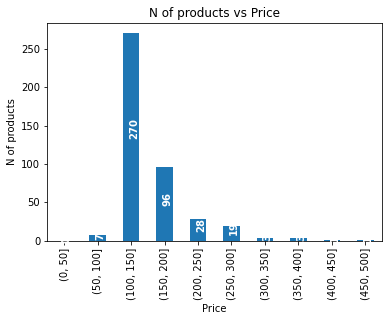

In [145]:
#product

#df = df[(df['closing_price'] >= 99) & (df['closing_price'] <= 101)]
#my_plot = product[product['price'] <= 500].groupby(pd.cut(product[product['price'] <= 500]['price'], np.arange(0,501,50)))['asin'].count().plot(kind='bar')

my_plot = product[(product['price'] >= 100) & (product['price'] <= 500)].groupby(pd.cut(product[(product['price'] >= 100) & (product['price'] <= 500)]['price'], np.arange(0,501,50)))['asin'].count().plot(kind='bar')
plt.xlabel("Price")
plt.ylabel("N of products")
plt.title("N of products vs Price")
# loop to add the annotations
for p in my_plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    my_plot.annotate(f'{height.round(1)}', (x + width/1.5, y + height*0.5), ha='center', rotation=90, color = 'white', fontweight='bold')      

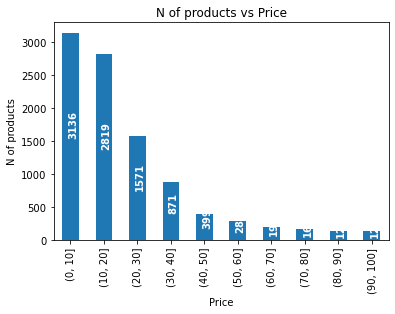

In [152]:
#product

#df = df[(df['closing_price'] >= 99) & (df['closing_price'] <= 101)]
#my_plot = product[product['price'] <= 500].groupby(pd.cut(product[product['price'] <= 500]['price'], np.arange(0,501,50)))['asin'].count().plot(kind='bar')

my_plot = product[product['price'] <= 100].groupby(pd.cut(product[product['price'] <= 100]['price'], np.arange(0,101,10)))['asin'].count().plot(kind='bar')
plt.xlabel("Price")
plt.ylabel("N of products")
plt.title("N of products vs Price")
# loop to add the annotations
for p in my_plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    my_plot.annotate(f'{height.round(1)}', (x + width/1.5, y + height*0.5), ha='center', rotation=90, color = 'white', fontweight='bold')      

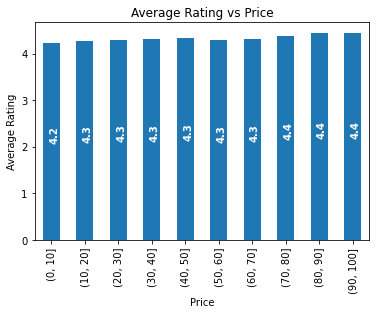

In [147]:
#product
my_plot = product[product['price'] <= 100].groupby(pd.cut(product[product['price'] <= 100]['price'], np.arange(0,101,10)))['avg_Rating_all'].mean().plot(kind='bar')
plt.xlabel("Price")
plt.ylabel("Average Rating")
plt.title("Average Rating vs Price")
# loop to add the annotations
for p in my_plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    my_plot.annotate(f'{height.round(1)}', (x + width/1.5, y + height*0.5), ha='center', rotation=90, color = 'white', fontweight='bold')   

    
    

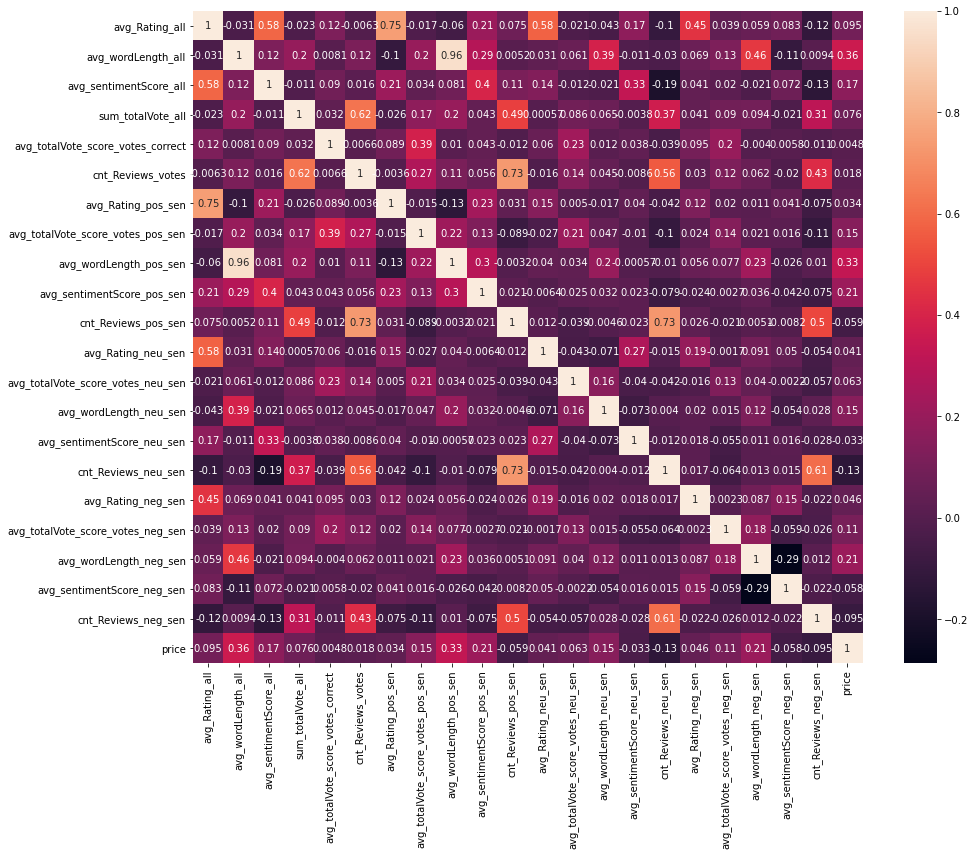

In [148]:
##########################################
## CORRELATION MATRIX - PRICE <= 100
##########################################

df_correl_prod = pd.DataFrame(product[product['price'] <= 100],columns=['avg_Rating_all',
                                          'avg_wordLength_all',
                                          'avg_sentimentScore_all',
                                          #'cnt_Reviews_all',
                                          #'sum_positiveVote_all',
                                          'sum_totalVote_all',
                                          'avg_totalVote_score_votes_correct',
                                          'cnt_Reviews_votes',
                                          'avg_Rating_pos_sen',
                                          'avg_totalVote_score_votes_pos_sen',
                                          'avg_wordLength_pos_sen',
                                          'avg_sentimentScore_pos_sen',
                                          'cnt_Reviews_pos_sen',
                                          'avg_Rating_neu_sen',
                                          'avg_totalVote_score_votes_neu_sen',
                                          'avg_wordLength_neu_sen',
                                          'avg_sentimentScore_neu_sen',
                                          'cnt_Reviews_neu_sen',
                                          'avg_Rating_neg_sen',
                                          'avg_totalVote_score_votes_neg_sen',
                                          'avg_wordLength_neg_sen',
                                          'avg_sentimentScore_neg_sen',
                                          'cnt_Reviews_neg_sen',                                            
                                          'price'                                              
                                         ])
corrMatrix = df_correl_prod.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corrMatrix, annot=True)
plt.show()

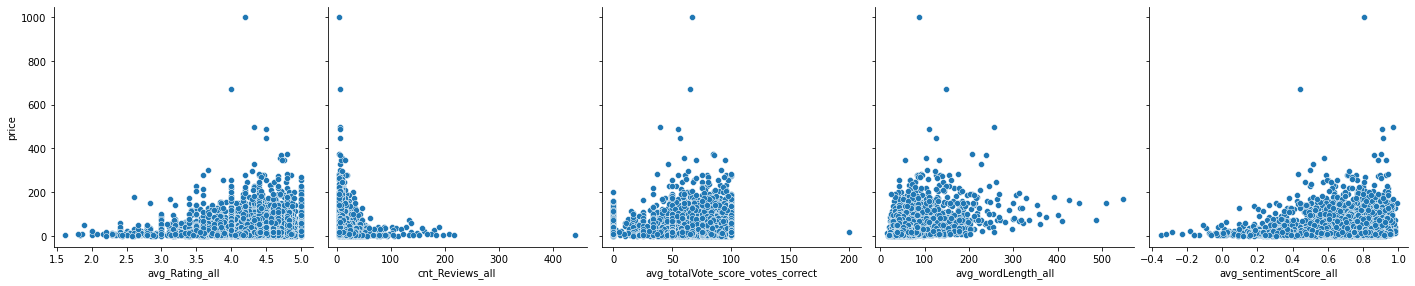

In [154]:
## SCATTER - Price vs Overall metrics
sns.pairplot(
    product,
    #product[product['price'] <= 500],
    x_vars=["avg_Rating_all","cnt_Reviews_all","avg_totalVote_score_votes_correct","avg_wordLength_all","avg_sentimentScore_all"],
    y_vars=['price'],
    size=4
)

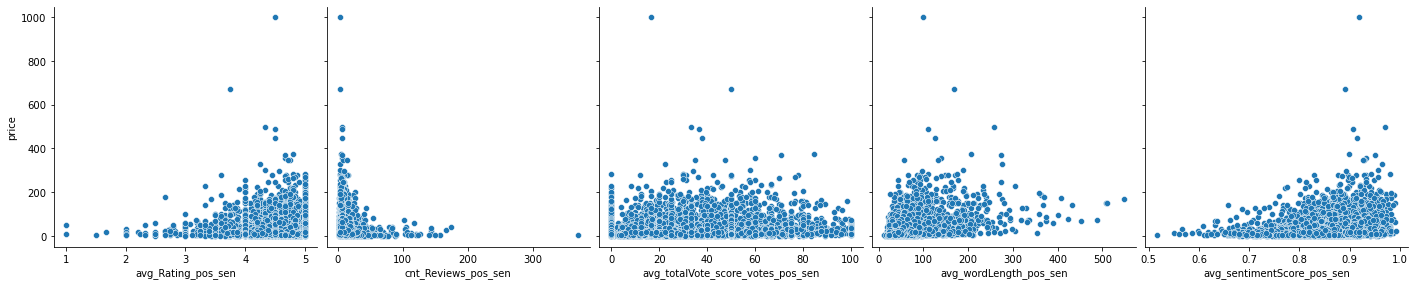

In [137]:
## SCATTER - Price vs Positive metrics
sns.pairplot(
    product,
    #product[product['price'] <= 500],
    x_vars=["avg_Rating_pos_sen","cnt_Reviews_pos_sen","avg_totalVote_score_votes_pos_sen","avg_wordLength_pos_sen","avg_sentimentScore_pos_sen"],
    y_vars=['price'],
    size=4
)

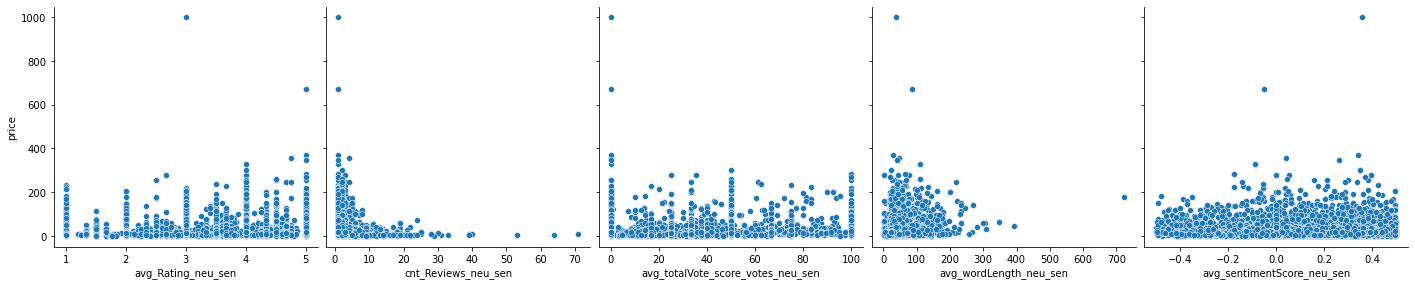

In [136]:
## SCATTER - Price vs Neutral metrics
sns.pairplot(
    product,
    #product[product['price'] <= 500],
    x_vars=["avg_Rating_neu_sen","cnt_Reviews_neu_sen","avg_totalVote_score_votes_neu_sen","avg_wordLength_neu_sen","avg_sentimentScore_neu_sen"],
    y_vars=['price'],
    size=4
)

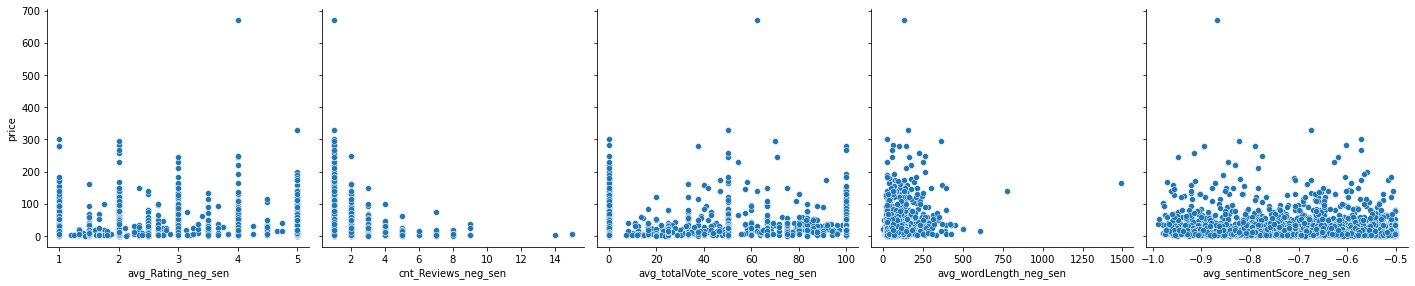

In [135]:
## SCATTER - Price vs Negative metrics
sns.pairplot(
    product,
    #product[product['price'] <= 500],
    x_vars=["avg_Rating_neg_sen","cnt_Reviews_neg_sen","avg_totalVote_score_votes_neg_sen","avg_wordLength_neg_sen","avg_sentimentScore_neg_sen"],
    y_vars=['price'],
    size=4
)

In [40]:
###############################################################################
### 4)Which group of reviewers is more valuable to the business? -- CANT BE ANSWERED BECAUSE DON’T HAVE DATA FOR THE ACTUAL BUYERS. 
###                                                                 HOWEVER, WE CAN TRY TO EVALUATE WHICH REVIEWS ARE MORE VALUABLE TO THE BUSINESS.
###                                                                 THE APPROACH IS TO HAVE THE TOTAL REVENUE OF PRODUCTS BOUGHT AFTER VIEWING.
###############################################################################

##########################################
## IMPORT PRODUCTS BOUGHT AFTER VIEWING
##########################################
buy_after = pd.read_csv(r'file_related_buy_after_viewing.csv')

##########################################
## IMPORT PRODUCTS STRUCTURED META DATA
##########################################
product_temp = pd.read_csv(r'asin_df.csv')

## APPEND META DATA TO buy_after_viewing
temp_1 = pd.merge(buy_after[['buy_after_viewing']],product_temp[['asin','price']],left_on='buy_after_viewing',right_on='asin', how='left').dropna()
temp_2 = pd.merge(buy_after,temp_1[['buy_after_viewing','price']],on='buy_after_viewing', how='left').dropna()
temp_3 = temp_2.groupby(['asin']).sum()['price'].reset_index(name ='rel_revenue_after')
product_buy_after = pd.merge(product_temp,temp_3,on='asin', how='left').dropna()
product_buy_after.head()

,Unnamed: 0,metadataid,asin,category,rank,price,avg_Rating_all,avg_totalVote_score_all_incorrect,avg_wordLength_all,avg_sentimentScore_all,...,avg_totalVote_score_votes_neu_sen,avg_wordLength_neu_sen,avg_sentimentScore_neu_sen,cnt_Reviews_neu_sen,avg_Rating_neg_sen,avg_totalVote_score_votes_neg_sen,avg_wordLength_neg_sen,avg_sentimentScore_neg_sen,cnt_Reviews_neg_sen,rel_revenue_after
2319,2319,2689722,B000FEY76O,No Category,0,12.99,4.250000,48.148148,146.500000,0.462425,...,50.000000,72.000000,0.010600,2.0,1.00,0.0000,61.00,-0.7431,1.0,56.99
3132,3132,2778406,B000HDJT6Q,No Category,0,2.18,3.912281,7.785088,69.877193,0.427326,...,8.695652,45.260870,0.124878,23.0,2.75,23.4375,127.25,-0.6474,4.0,60.17
3185,3185,2957896,B000NHRWHE,Watches,13502,20.69,4.285714,14.285714,49.142857,0.284129,...,33.333333,47.666667,0.226233,3.0,3.00,0.0000,47.00,-0.8722,1.0,31.92
3269,3269,3234827,B000WO84Z2,No Category,0,8.79,4.105263,12.639553,57.245614,0.509209,...,23.262032,48.823529,0.174847,17.0,2.00,0.0000,76.75,-0.6702,4.0,32.84
3776,3776,4419319,B002X9MY82,Computers & Accessories,3963,35.84,3.333333,37.500000,114.833333,0.359917,...,0.000000,110.000000,-0.214400,1.0,2.00,0.0000,118.00,-0.9179,1.0,21.49


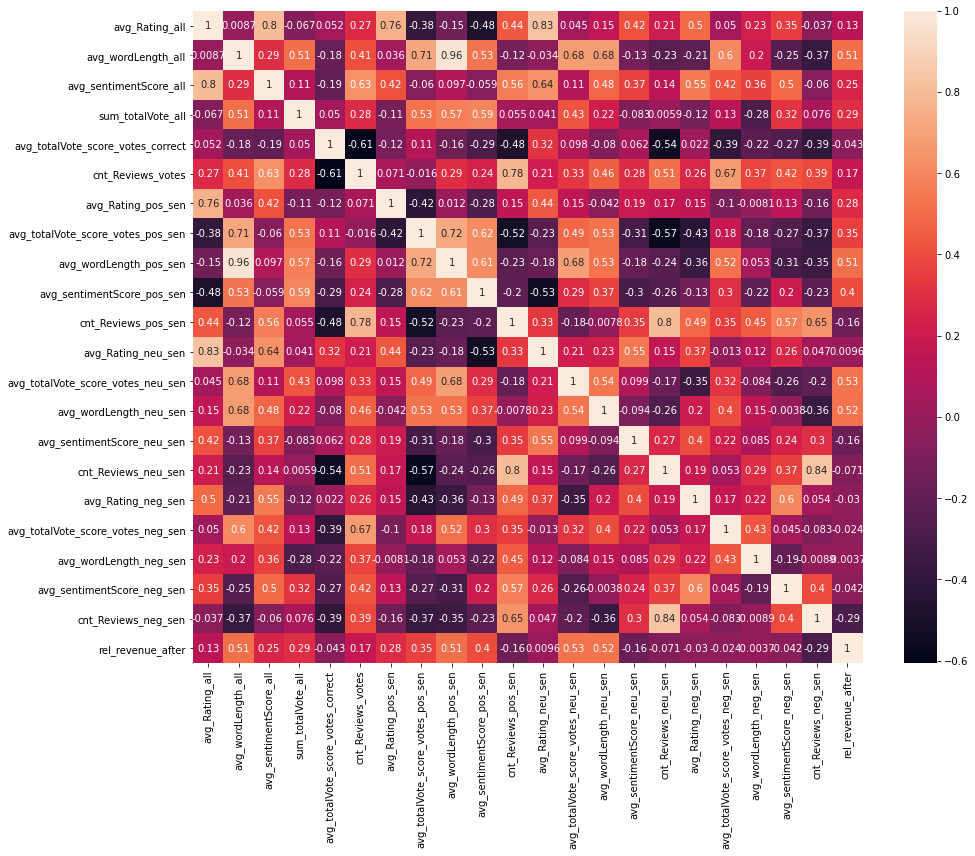

In [42]:
###############################################################
## CORRELATION MATRIX REVENUE FROM RELATED BOUGHT AFTER VIEWING
###############################################################

df_correl_related = pd.DataFrame(product_buy_after,columns=['avg_Rating_all',
                                                            'avg_wordLength_all',
                                                            'avg_sentimentScore_all',
                                                            'sum_totalVote_all',
                                                            'avg_totalVote_score_votes_correct',
                                                            'cnt_Reviews_votes',
                                                            'avg_Rating_pos_sen',
                                                            'avg_totalVote_score_votes_pos_sen',
                                                            'avg_wordLength_pos_sen',
                                                            'avg_sentimentScore_pos_sen',
                                                            'cnt_Reviews_pos_sen',
                                                            'avg_Rating_neu_sen',
                                                            'avg_totalVote_score_votes_neu_sen',
                                                            'avg_wordLength_neu_sen',
                                                            'avg_sentimentScore_neu_sen',
                                                            'cnt_Reviews_neu_sen',
                                                            'avg_Rating_neg_sen',
                                                            'avg_totalVote_score_votes_neg_sen',
                                                            'avg_wordLength_neg_sen',
                                                            'avg_sentimentScore_neg_sen',
                                                            'cnt_Reviews_neg_sen',                                            
                                                            'rel_revenue_after'                                              
                                                           ])
corrMatrix = df_correl_related.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [86]:
##################################################################################
### 5)Is there a relation between reviews from products which are bought together?
##################################################################################

##########################################
## IMPORT PRODUCTS BOUGHT AFTER VIEWING
##########################################
bought_together = pd.read_csv(r'file_related_bought_together.csv')

##########################################
## IMPORT PRODUCTS STRUCTURED META DATA
##########################################
product_temp = pd.read_csv(r'asin_df.csv')

## APPEND META DATA TO buy_after
temp_1 = pd.merge(bought_together[['bought_together']],product_temp,left_on='bought_together',right_on='asin', how='left').dropna().drop_duplicates()
temp_2 = pd.merge(bought_together,temp_1,on='bought_together', how='left').dropna().drop_duplicates()

product_bought_together =  temp_2.groupby('asin_x',as_index=False).agg({'bought_together':'count',
                                                                        'rank':'mean',
                                                                        'price':'mean',
                                                                        'avg_Rating_all':'mean',
                                                                        'avg_totalVote_score_all_incorrect':'mean',
                                                                        'avg_wordLength_all':'mean',
                                                                        'avg_sentimentScore_all':'mean',
                                                                        'cnt_Reviews_all':['sum','mean'],
                                                                        'sum_positiveVote_all':['sum','mean'],
                                                                        'sum_totalVote_all':['sum','mean'],
                                                                        'avg_Rating_votes':'mean',
                                                                        'avg_totalVote_score_votes_correct':'mean',
                                                                        'avg_wordLength_votes':'mean',
                                                                        'avg_sentimentScore_votes':'mean',
                                                                        'cnt_Reviews_votes':['sum','mean'],
                                                                        'avg_Rating_pos_sen':'mean',
                                                                        'avg_totalVote_score_votes_pos_sen':'mean',
                                                                        'avg_wordLength_pos_sen':'mean',
                                                                        'avg_sentimentScore_pos_sen':'mean',
                                                                        'cnt_Reviews_pos_sen':['sum','mean'],
                                                                        'avg_Rating_neu_sen':'mean',
                                                                        'avg_totalVote_score_votes_neu_sen':'mean',
                                                                        'avg_wordLength_neu_sen':'mean',
                                                                        'avg_sentimentScore_neu_sen':'mean',
                                                                        'cnt_Reviews_neu_sen':['sum','mean'],
                                                                        'avg_Rating_neg_sen':'mean',
                                                                        'avg_totalVote_score_votes_neg_sen':'mean',
                                                                        'avg_wordLength_neg_sen':'mean',
                                                                        'avg_sentimentScore_neg_sen':'mean',
                                                                        'cnt_Reviews_neg_sen':['sum','mean'],
                                                                      })

### FLATTEN MULTI AGGREGATION
product_bought_together.columns = ['_'.join(col).strip() for col in product_bought_together.columns.values]

product_bought_together.rename(columns =   {'asin_x_':'asin',
                                            'bought_together_count':'N products bought together',
                                            'rank_mean':'Average rank of bought together',
                                            'price_mean':'Average price of bought together',
                                            'avg_Rating_all_mean':'Average Rating of bought together',
                                            'avg_totalVote_score_all_incorrect_mean':'Average Helpfulness of bought together INCORRECT',
                                            'avg_wordLength_all_mean':'Average Words of bought together',
                                            'avg_sentimentScore_all_mean':'Average Sentiment of bought together',
                                            'cnt_Reviews_all_sum':'Reviews of bought together',
                                            'cnt_Reviews_all_mean':'Average Reviews of bought together',
                                            'sum_positiveVote_all_sum':'Positive votes of bought together',
                                            'sum_positiveVote_all_mean':'Average Positive votes of bought together',
                                            'sum_totalVote_all_sum':'Votes of bought together',
                                            'sum_totalVote_all_mean':'Average Votes of bought together',
                                            'avg_Rating_votes_mean':'Average Rating of reviews with vote of bought together',
                                            'avg_totalVote_score_votes_correct_mean':'Average Helpfulness of bought together',
                                            'avg_wordLength_votes_mean':'Average Words of reviews with vote of bought together',
                                            'avg_sentimentScore_votes_mean':'Average Sentiment of reviews with vote of bought together',
                                            'cnt_Reviews_votes_sum':'Reviews with votes of bought together',
                                            'cnt_Reviews_votes_mean':'Average Reviews with votes of bought together',
                                            'avg_Rating_pos_sen_mean':'Average Rating with Pos Sentiment of bought together',
                                            'avg_totalVote_score_votes_pos_sen_mean':'Average Helpfulness with Pos Sentiment of bought together',
                                            'avg_wordLength_pos_sen_mean':'Average Words with Pos Sentiment of bought together',
                                            'avg_sentimentScore_pos_sen_mean':'Average Sentiment with Pos Sentiment of bought together',
                                            'cnt_Reviews_pos_sen_sum':'Reviews with Pos Sentiment of bought together',
                                            'cnt_Reviews_pos_sen_mean':'Average Reviews with Pos Sentiment of bought together',
                                            'avg_Rating_neu_sen_mean':'Average Rating with Neu Sentiment of bought together',
                                            'avg_totalVote_score_votes_neu_sen_mean':'Average Helpfulness with Neu Sentiment of bought together',
                                            'avg_wordLength_neu_sen_mean':'Average Words with Neu Sentiment of bought together',
                                            'avg_sentimentScore_neu_sen_mean':'Average Sentiment with Neu Sentiment of bought together',
                                            'cnt_Reviews_neu_sen_sum':'Reviews with Neu Sentiment of bought together',
                                            'cnt_Reviews_neu_sen_mean':'Average Reviews with Neu Sentiment of bought together',
                                            'avg_Rating_neg_sen_mean':'Average Rating with Neg Sentiment of bought together',
                                            'avg_totalVote_score_votes_neg_sen_mean':'Average Helpfulness with Neg Sentiment of bought together',
                                            'avg_wordLength_neg_sen_mean':'Average Words with Neg Sentiment of bought together',
                                            'avg_sentimentScore_neg_sen_mean':'Average Sentiment with Neg Sentiment of bought together',
                                            'cnt_Reviews_neg_sen_sum':'Reviews with Neg Sentiment of bought together',
                                            'cnt_Reviews_neg_sen_mean':'Average Reviews with Neg Sentiment of bought together'
                                           }, inplace = True)

product_bought_together.head()

,asin,N products bought together,Average rank of bought together,Average price of bought together,Average Rating of bought together,Average Helpfulness of bought together INCORRECT,Average Words of bought together,Average Sentiment of bought together,Reviews of bought together,Average Reviews of bought together,...,Average Words with Neu Sentiment of bought together,Average Sentiment with Neu Sentiment of bought together,Reviews with Neu Sentiment of bought together,Average Reviews with Neu Sentiment of bought together,Average Rating with Neg Sentiment of bought together,Average Helpfulness with Neg Sentiment of bought together,Average Words with Neg Sentiment of bought together,Average Sentiment with Neg Sentiment of bought together,Reviews with Neg Sentiment of bought together,Average Reviews with Neg Sentiment of bought together
0,B00007GD9W,1,0.0,29.99,4.587500,16.458333,53.762500,0.726200,80.0,80.0,...,44.230769,0.123177,13.0,13.0,2.500000,0.0,30.0,-0.6399,2.0,2.0
1,B00007GDG5,1,0.0,25.99,4.380952,25.576342,63.190476,0.729355,42.0,42.0,...,39.500000,0.355750,4.0,4.0,1.500000,0.0,127.5,-0.5649,2.0,2.0
2,B00007IVVR,1,8267.0,0.68,2.583333,40.756173,69.916667,0.295525,12.0,12.0,...,47.000000,0.067575,4.0,4.0,3.000000,37.5,78.5,-0.6227,2.0,2.0
3,B00009OXE8,1,1927.0,9.49,3.500000,6.250000,52.000000,0.324167,12.0,12.0,...,26.000000,-0.177900,1.0,1.0,1.666667,0.0,41.0,-0.7275,3.0,3.0
4,B0000B35EM,1,2653.0,57.61,3.785714,93.402778,65.714286,0.586100,14.0,14.0,...,67.500000,0.376875,4.0,4.0,4.000000,100.0,117.0,-0.9326,1.0,1.0


In [87]:
product_temp = product_temp[['asin','avg_Rating_all','avg_wordLength_all','avg_sentimentScore_all','avg_totalVote_score_votes_correct','cnt_Reviews_pos_sen','cnt_Reviews_neu_sen','cnt_Reviews_neg_sen']]
product_temp.rename(columns =  {'asin':'asin',
                                'avg_Rating_all':'Average Rating',
                                'avg_wordLength_all':'Average Words',
                                'avg_sentimentScore_all':'Average Sentiment',
                                'avg_totalVote_score_votes_correct':'Helpfulness',
                                'cnt_Reviews_pos_sen':'Reviews with Positive Sentiment',
                                'cnt_Reviews_neu_sen':'Reviews with Neutral Sentiment',
                                'cnt_Reviews_neg_sen':'Reviews with Negative Sentiment'
                               }, inplace = True)


temp_2 = pd.merge(product_temp,
                  product_bought_together[['asin',
                                           'Average Rating of bought together',
                                           'Average Words of bought together',
                                           'Average Sentiment of bought together',
                                           'Average Helpfulness of bought together',
                                           'Average Reviews with Pos Sentiment of bought together',
                                           'Average Reviews with Neu Sentiment of bought together',
                                           'Average Reviews with Neg Sentiment of bought together'
                                         ]],
                  on='asin', how='left').dropna()
temp_2.head()

,asin,Average Rating,Average Words,Average Sentiment,Helpfulness,Reviews with Positive Sentiment,Reviews with Neutral Sentiment,Reviews with Negative Sentiment,Average Rating of bought together,Average Words of bought together,Average Sentiment of bought together,Average Helpfulness of bought together,Average Reviews with Pos Sentiment of bought together,Average Reviews with Neu Sentiment of bought together,Average Reviews with Neg Sentiment of bought together
42,B0000B35EM,3.944444,47.888889,0.542133,98.143939,13.0,4.0,1.0,3.785714,65.714286,0.586100,93.402778,9.0,4.0,1.0
138,B000NDCHNW,4.000000,74.534884,0.606512,77.622378,33.0,7.0,3.0,4.400000,39.480000,0.516836,95.833333,17.0,7.0,1.0
239,B000FOJZVQ,4.297297,83.270270,0.567297,97.368421,26.0,9.0,2.0,4.587500,53.762500,0.726200,77.450980,65.0,13.0,2.0
320,B000GB0FYO,4.200000,130.800000,0.387747,95.000000,9.0,4.0,2.0,4.050000,82.650000,0.486450,74.234694,12.0,7.0,1.0
399,B000A7G45I,3.861111,79.222222,0.483842,87.031816,23.0,10.0,3.0,4.432099,67.296296,0.527316,76.354167,54.0,23.0,4.0


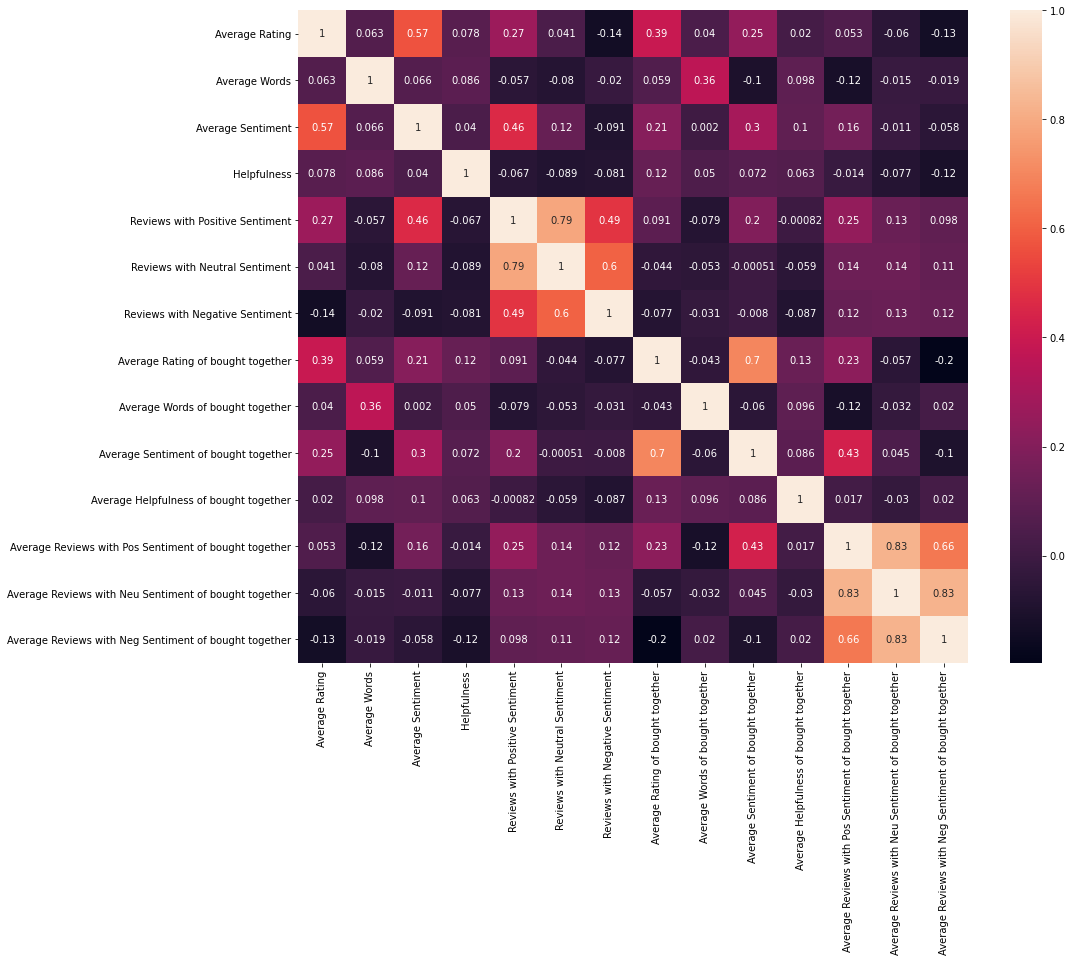

In [90]:
df_correl_related = temp_2
corrMatrix = df_correl_related.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corrMatrix, annot=True)
plt.show()